In [207]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud_2020 #pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip
#For ML
import sklearn
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition

import nltk #For tokenizing and normalizing
import numpy as np #arrays
import matplotlib.pyplot as plt #Plots
import matplotlib.colors # For nice colours
import seaborn #Makes plots look nice, also heatmaps
import scipy as sp #for interp

#These are from the standard library
import collections
import os
import os.path
import random
import re
import glob
import pandas
import requests
import json
import math

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Go back through all of the cells above and generate 10 distinct artificial datasets and classify them with all of the available methods. Add a cell immediately below and describe which classifier(s) worked best with which artificially constructed data source and why. Then go through all of the empirical datasets (i.e., Newsgroups, Senate Small, Senate Large, Email Spam) and classify them with all available methods. Add a second cell immediately below and describe which classifier(s) worked best with which data set and why.

In [208]:
# Generate data
noise = .2
noise1 = .4
noise2 = .8


# generating, splitting, and setting each generated dataset as a unique variable pair


#1
dfTrain1, dfTest1 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.andSplit(.35))

#2
dfTrain2, dfTest2 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.andSplit(noise1))

#3
dfTrain3, dfTest3 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.andSplit(noise2))

#4
dfTrain4, dfTest4 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.xorSplit(noise1))

#5
dfTrain5, dfTest5 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.xorSplit(noise2))

#6
dfTrain6, dfTest6 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.targetSplit(.001))

#7
dfTrain7, dfTest7 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.targetSplit(noise2))

#8
dfTrain8, dfTest8 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.multiBlobs(noise))

#9
dfTrain9, dfTest9 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.multiBlobs(noise1))

#10
dfTrain10, dfTest10 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.multiBlobs(noise2))

In [209]:
# putting all the pairs in a list
split_data = [(dfTrain1, dfTest1), (dfTrain2, dfTest2), (dfTrain3, dfTest3), 
        (dfTrain4, dfTest4), (dfTrain5, dfTest5), (dfTrain6, dfTest6), 
        (dfTrain7, dfTest7), (dfTrain8, dfTest8), (dfTrain9, dfTest9), 
        (dfTrain10, dfTest10)]

# putting all the different types of algorithms into a list
models = [(sklearn.naive_bayes.GaussianNB()), (sklearn.svm.SVC(kernel = 'linear', probability = True)), 
          (sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True)), 
          (sklearn.neighbors.KNeighborsClassifier(5, weights='distance')),
          (sklearn.linear_model.LogisticRegression()), (sklearn.tree.DecisionTreeClassifier()),
          (sklearn.ensemble.RandomForestClassifier()), (sklearn.neural_network.MLPClassifier()),
          (sklearn.ensemble.GradientBoostingClassifier())]

####### DATSET 1
GaussianNB(priors=None, var_smoothing=1e-09)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.165  0.834634   0.828571           0.781723  0.852941
1              0.165  0.834634   0.842105           0.777433  0.816327


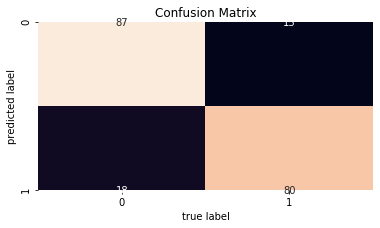

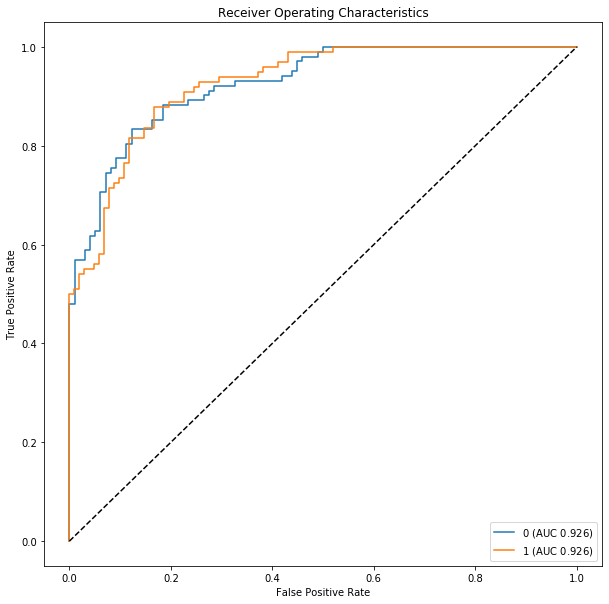

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


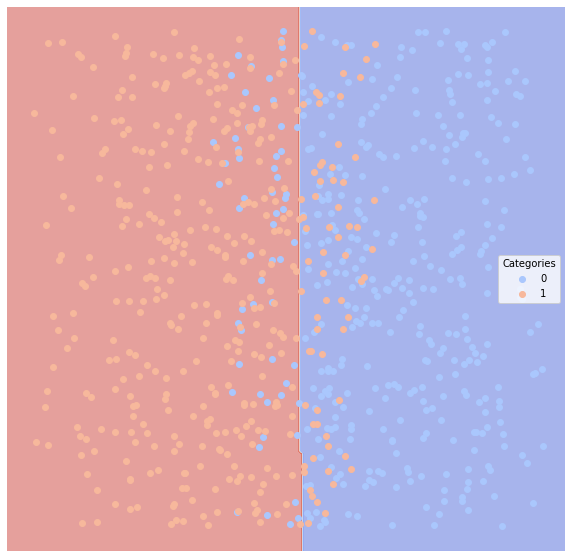

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.16  0.839136   0.818182           0.781925  0.882353
1               0.16  0.839136   0.866667           0.789796  0.795918


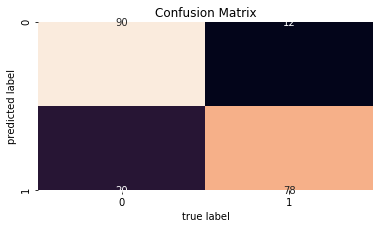

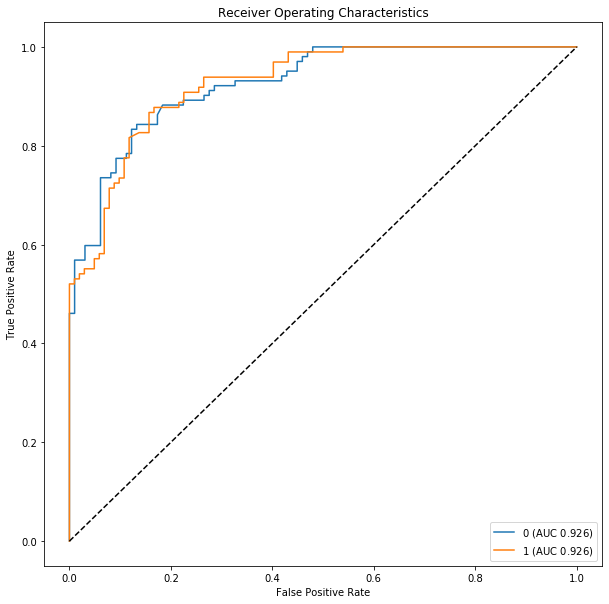

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


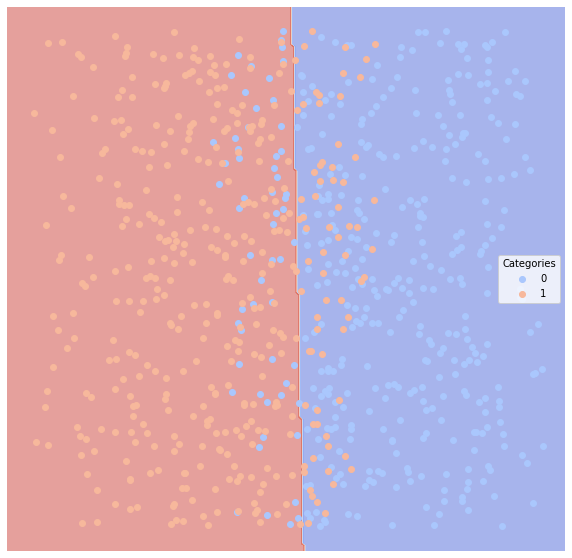

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
          Error_Rate      AUC  Precision  Average_Precision    Recall
Category                                                             
0               0.15  0.85094   0.891304           0.816539  0.803922
1               0.15  0.85094   0.814815           0.781670  0.897959


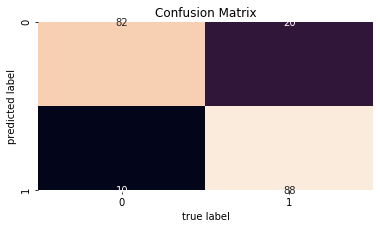

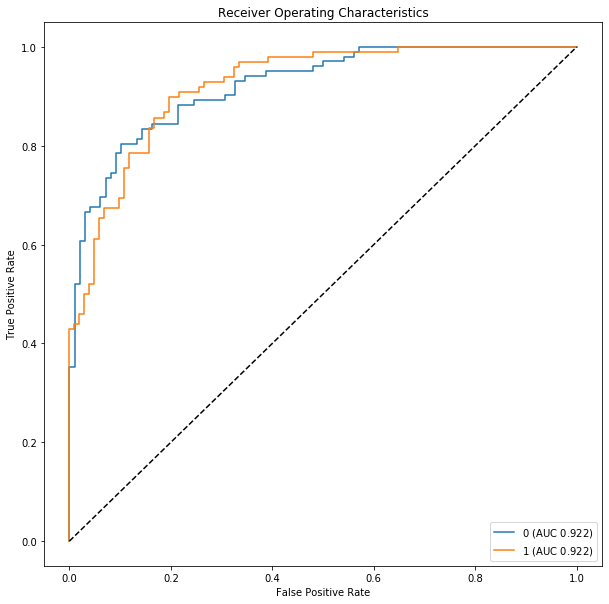

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


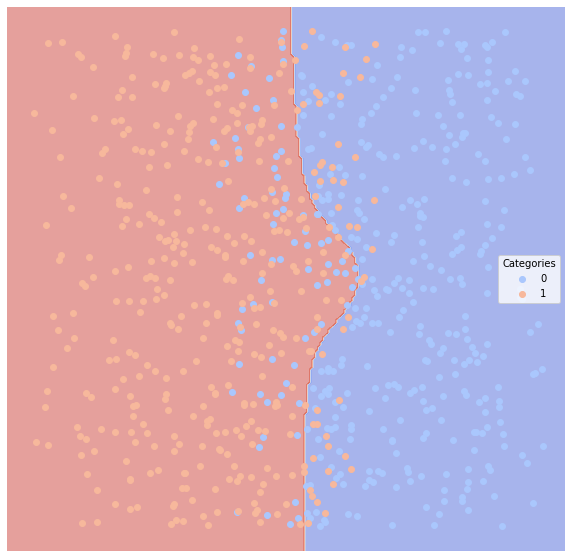

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.185  0.814826   0.815534           0.761616  0.823529
1              0.185  0.814826   0.814433           0.751533  0.806122


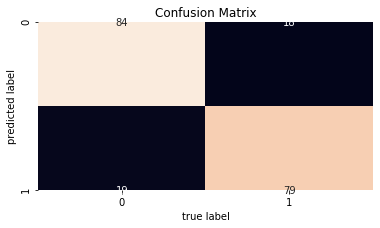

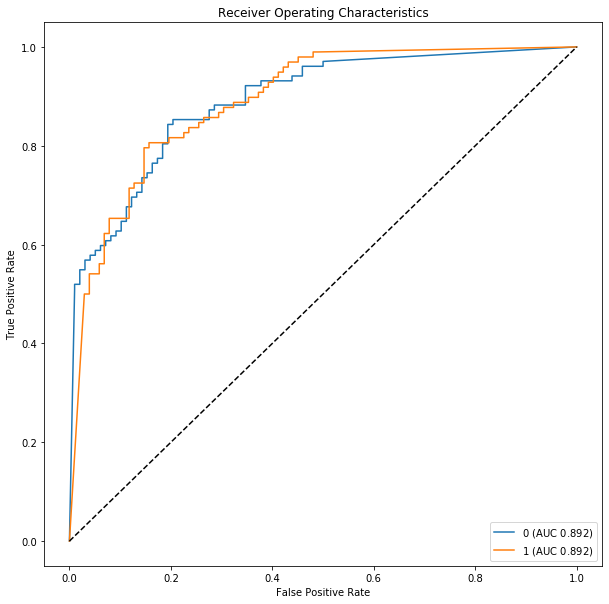

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


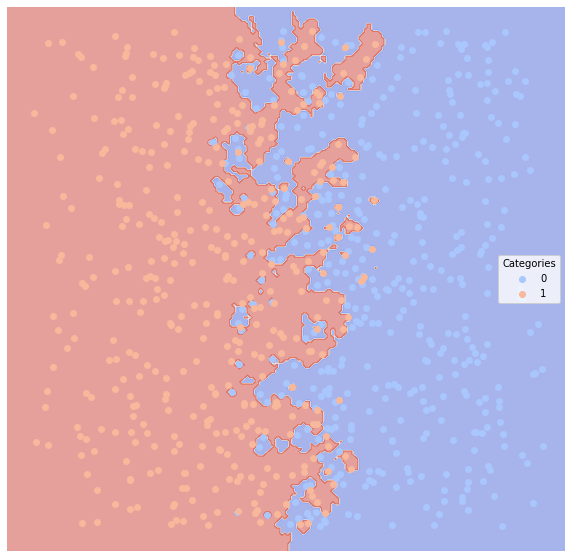

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.155  0.844638   0.838095           0.793063  0.862745
1              0.155  0.844638   0.852632           0.789726  0.826531


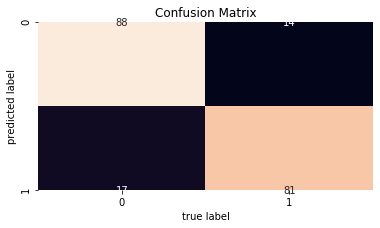

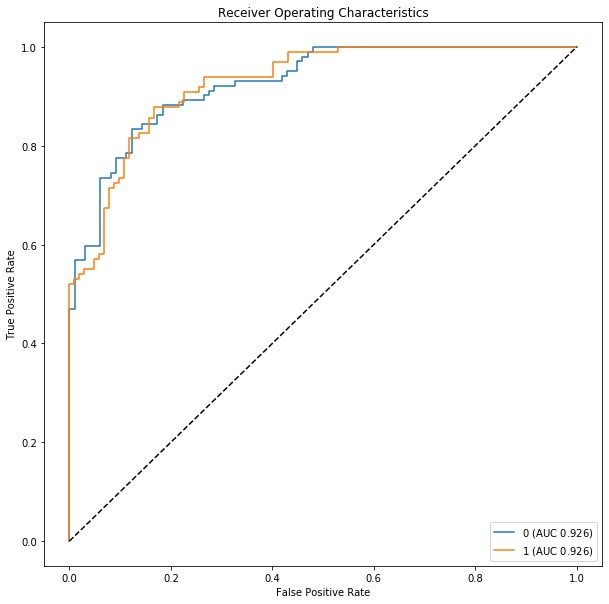

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


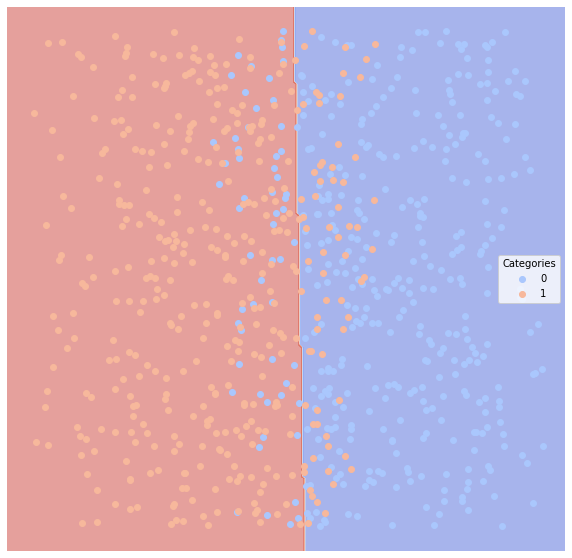

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.245  0.755002   0.762376           0.700519  0.754902
1              0.245  0.755002   0.747475           0.684420  0.755102


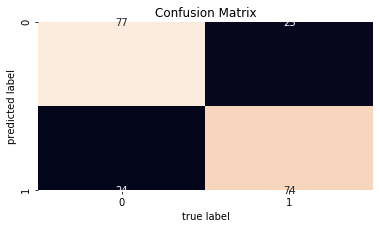

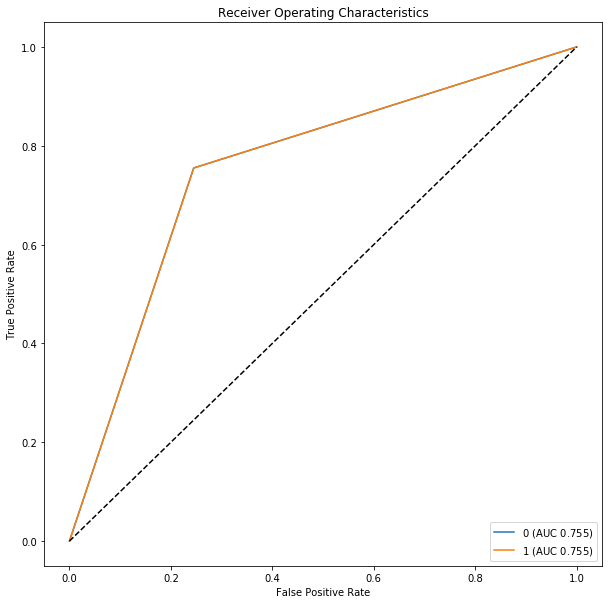

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


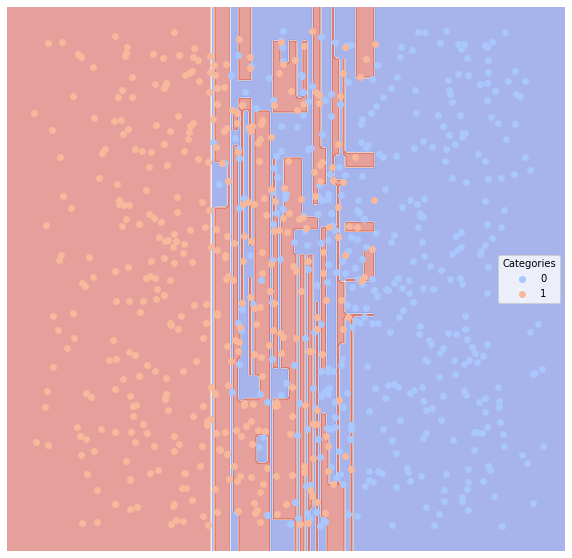

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.235  0.764406   0.757009           0.706154  0.794118
1              0.235  0.764406   0.774194           0.698795  0.734694


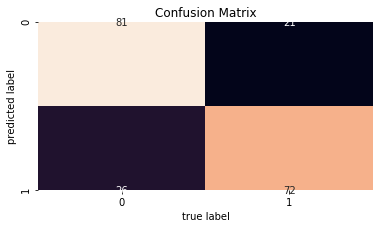

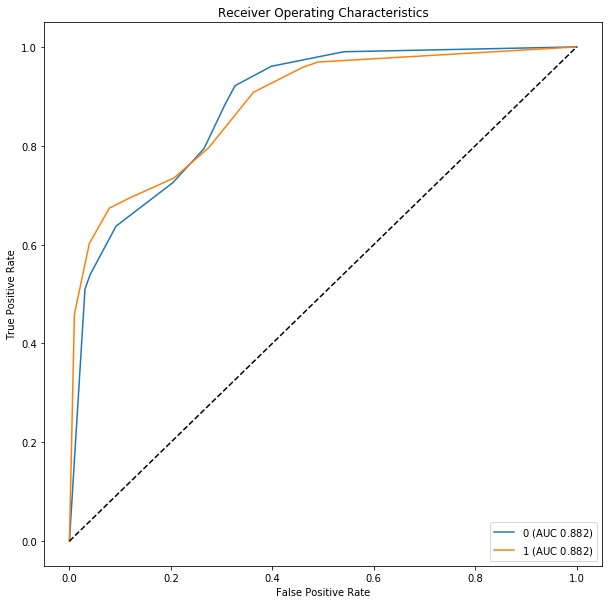

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


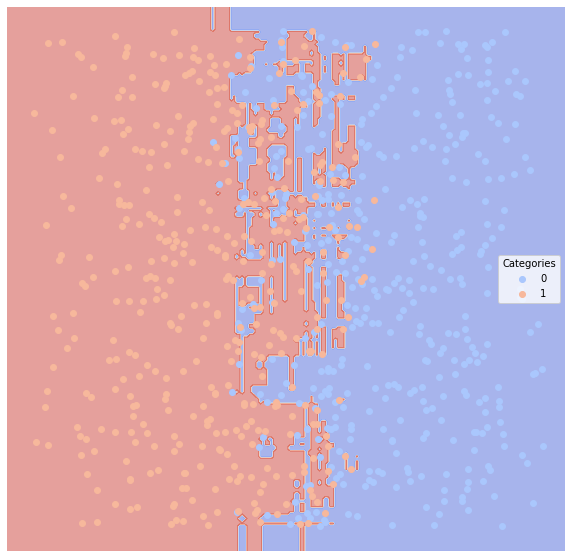

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.165  0.834434   0.822430           0.779547  0.862745
1              0.165  0.834434   0.849462           0.779771  0.806122


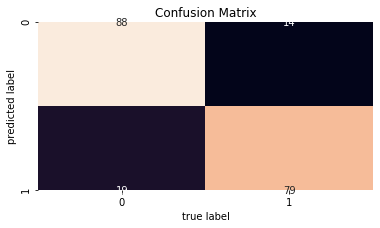

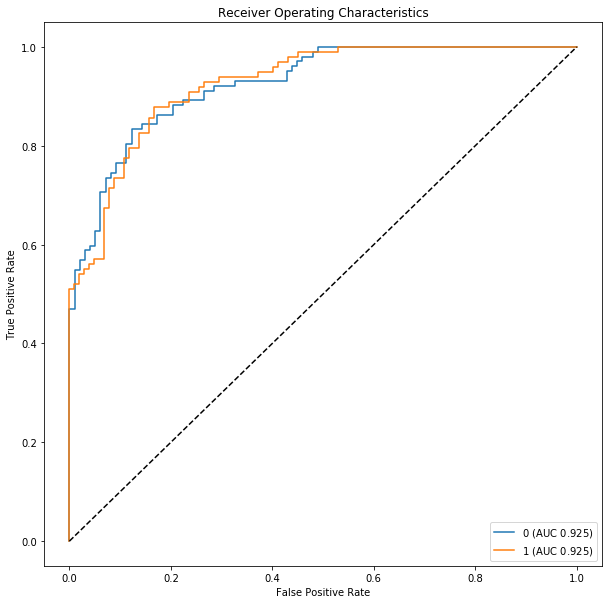

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


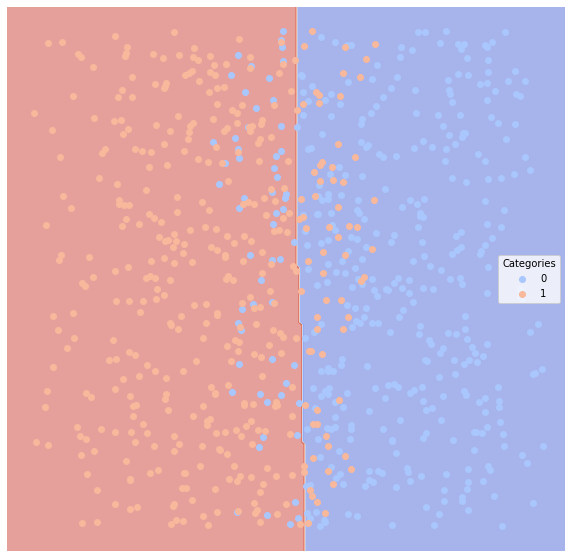

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.19  0.809724   0.807692           0.755158  0.823529
1               0.19  0.809724   0.812500           0.746684  0.795918


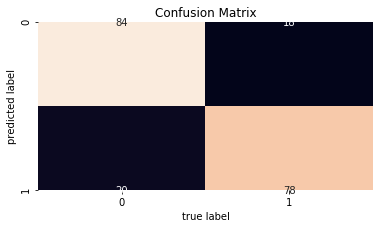

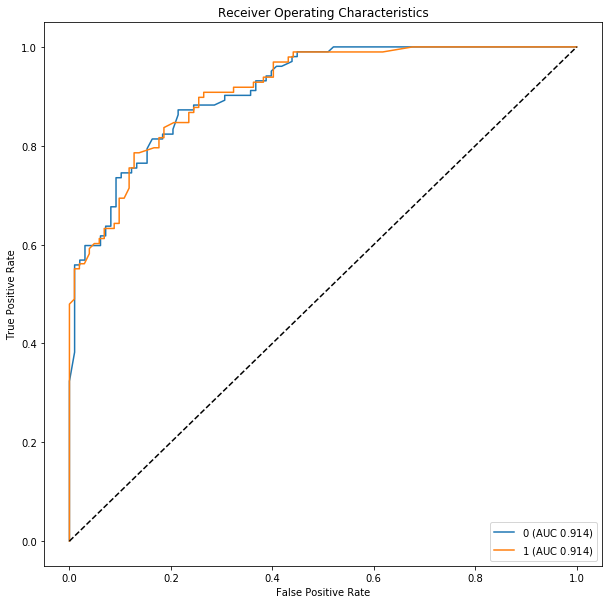

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


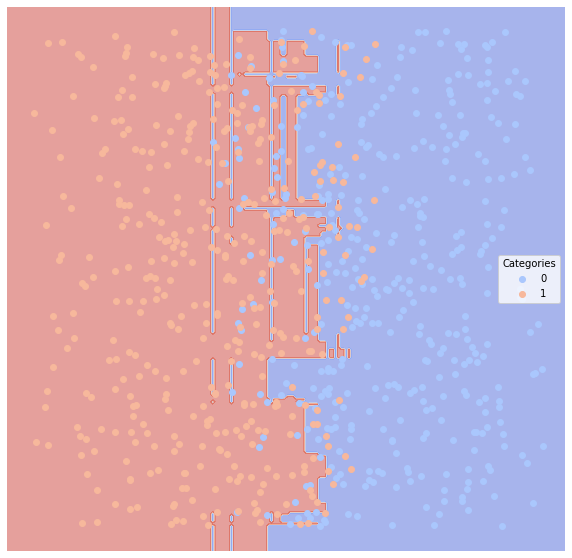

YUH #######
####### DATSET 2
GaussianNB(priors=None, var_smoothing=1e-09)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.175  0.827496   0.868687           0.801732  0.796296
1              0.175  0.827496   0.782178           0.736653  0.858696


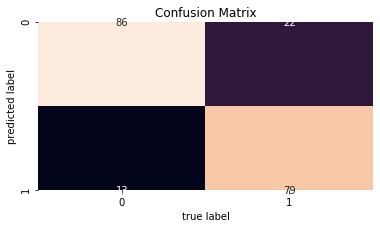

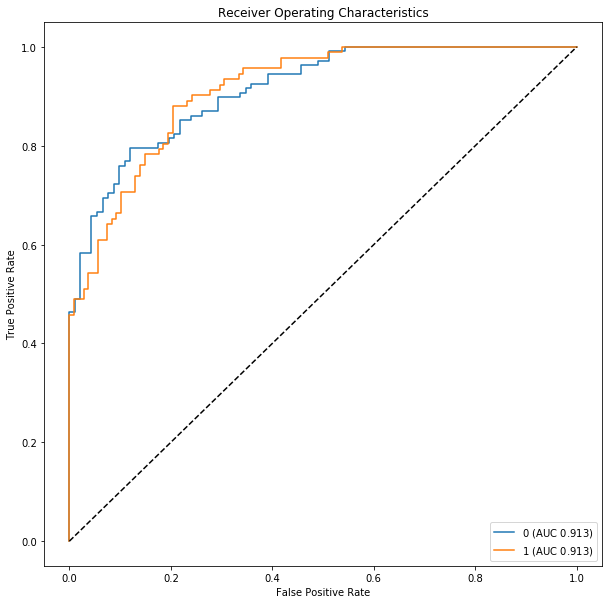

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


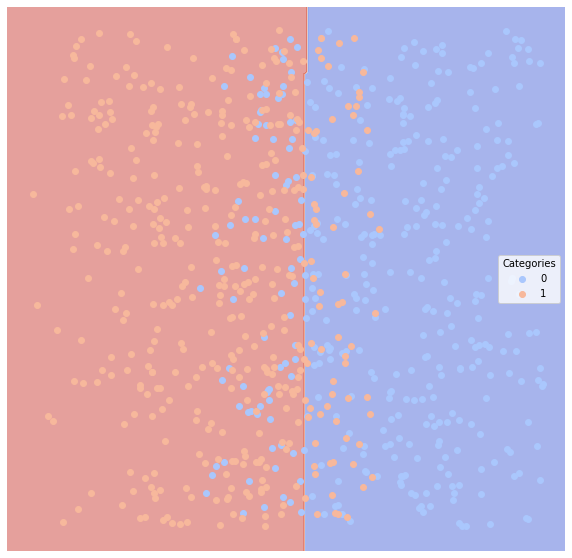

KeyboardInterrupt: 

In [230]:
# looping over the generated datasets, runing each type of model, and returning the evaluation for each model

count = 0
for pair in split_data:
    
    
    dfTrain = pair[0]
    dfTest = pair[1]
    
    count += 1
    print('####### ' + 'DATSET ' + str(count))
    
    for model in models:
        
        clf = model
        clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
    
        print(str(model))
        df = lucem_illud_2020.evaluateClassifier(clf, dfTest)
        print(df)
        lucem_illud_2020.plotConfusionMatrix(clf, dfTest)
        lucem_illud_2020.plotMultiROC(clf, dfTest)
        lucem_illud_2020.plotregions(clf, dfTrain)
    
    print('YUH #######')



<span style="color:red">***Stretch*** (but also required) Wander through the SKLearn documentation available [here](http://scikit-learn.org/stable/), particularly perusing the classifiers. In cells following, identify and implement a new classifier that we have not yet used (e.g., AdaBoost, CART) on one artificial dataset and one real dataset (used above). Then, in the next cell describe the classifier, detail how it compares with the approaches above, and why it performed better or worse than others.

/
/
/

# <span style="color:red">*Exercise 2*</span>

<span style="color:red">In the cells immediately following, perform Logistic and Naïve Bayes classification (binary or multinomial) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project (e.g., these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week). Visualize the confusion matrix for training and testing sets. Calculate precision, recall, the F-measure, and AUC, then perform an ROC visualization. How do these classifiers perform? Exrapolate codes from these models to all uncoded data.


In [17]:
## LOGISTIC

# Predict groups of text as having negative sentiment

# read survey data as df
yelp_survey = pandas.read_excel("Content-Analysis Survey-data.xlsx")
yelp_survey = yelp_survey.T
yelp_survey = yelp_survey.drop(yelp_survey.index[0])

# Will use Reviewer 3 as the true values for classification
Sentiment = yelp_survey[3].to_frame()
Sentiment.index = range(5)


In [18]:
# Combine human annotation with yelp reviews
yelp_reviews = pandas.read_excel("Yelp-Reviews.xlsx")
yelp_reviews = yelp_reviews.join(Sentiment, lsuffix='Review', rsuffix='3')
yelp_reviews = yelp_reviews.rename(columns={'Unnamed: 0': "Item", 3:'Sentiment'})
yelp_reviews


,Item,Date,Stars,Review,Sentiment
0,Review 1,2016-09-08,3,I lived here for a little over two and a half ...,Negative
1,Review 2,2019-03-10,1,This is the worst apartment I've ever lived in...,Negative
2,Review 3,2017-10-27,5,"Personally, I love this place. I moved here Au...",Positive
3,Review 4,2014-11-07,4,It's an older style building than what I have ...,Positive
4,Review 5,2013-08-08,2,"It's an ok place to live, but I had my bike st...",Neutral


In [19]:
#Add column to make negative or not negative
yelp_reviews['category'] = [x == 'Negative' for x in yelp_reviews['Sentiment']]

In [20]:
# Vector and Tokenize
yelp_reviews['tokenized_text'] = yelp_reviews['Review'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
yelp_reviews['normalized_text'] = yelp_reviews['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))
yelp_reviews.shape


(5, 8)

In [21]:
# train/test split
holdBackFraction = .2
train_yelp_df, test_yelp_df = lucem_illud_2020.trainTestSplit(yelp_reviews, holdBackFraction=holdBackFraction)

print(len(train_yelp_df))
print(len(test_yelp_df))

4
1


In [22]:
# Turn into a tfdf matrix

TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform(train_yelp_df['Review'])
train_yelp_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]



In [23]:
#reduce dimensions
pca = sklearn.decomposition.PCA()
reduced_data = pca.fit_transform(np.stack(train_yelp_df['vect'], axis=0))

train_yelp_df['pca'] = [r for r in reduced_data]

In [24]:
train_yelp_df['category']

1     True
2    False
3    False
4    False
Name: category, dtype: bool

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


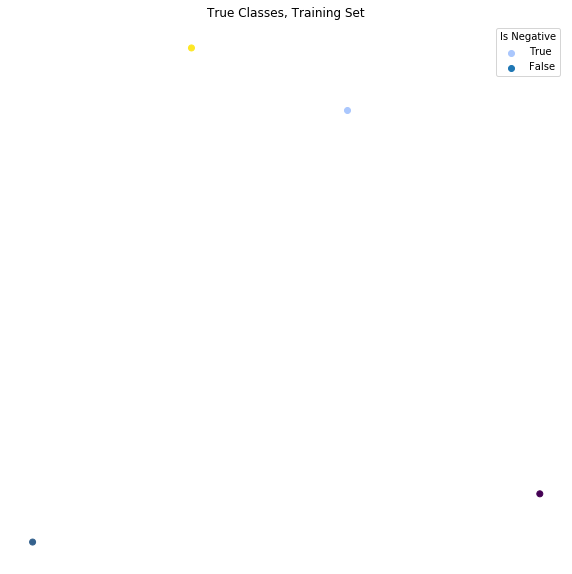

In [25]:
fig, ax = plt.subplots(figsize = (10,10))
ax.axis('off')
pallet = seaborn.color_palette(palette='coolwarm', n_colors = 2)

#Plot Negative
a = np.stack(train_yelp_df[train_yelp_df['category']]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[0], label = "True")

#Plot not Negative
a = np.stack(train_yelp_df[train_yelp_df['category'].eq(False)]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[1], label = "False")
    
ax.legend(loc = 'upper right', title = 'Is Negative')
plt.title('True Classes, Training Set')
plt.show()


#wait what is that yellow dot?


In [26]:

train_yelp_df['pca_reduced_10'] = train_yelp_df['pca'].apply(lambda x: x[:10])

logistic = sklearn.linear_model.LogisticRegression()
logistic.fit(np.stack(train_yelp_df['pca_reduced_10'], axis=0), train_yelp_df['category'])

logistic.score(np.stack(train_yelp_df['pca_reduced_10'], axis=0), train_yelp_df['category'])


0.75

In [27]:
## Testing against 10 dimensions

#Create vectors
TFVects_test = TFVectorizer.transform(test_yelp_df['Review'])
test_yelp_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#PCA
reduced_data_test = pca.transform(np.stack(test_yelp_df['vect'], axis=0))
test_yelp_df['pca'] = [r for r in reduced_data_test]
test_yelp_df['pca_reduced_10'] = test_yelp_df['pca'].apply(lambda x: x[:10])

#Test
logistic.score(np.stack(test_yelp_df['pca_reduced_10'], axis=0), test_yelp_df['category'])

0.0

In [28]:
## Testing against forty dimensions

train_yelp_df['pca_reduced_40'] = train_yelp_df['pca'].apply(lambda x: x[:40])
test_yelp_df['pca_reduced_40'] = test_yelp_df['pca'].apply(lambda x: x[:40])

logistic.fit(np.stack(train_yelp_df['pca_reduced_40'], axis=0), train_yelp_df['category'])

print("Training:")
print(logistic.score(np.stack(train_yelp_df['pca_reduced_40'], axis=0), train_yelp_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_yelp_df['pca_reduced_40'], axis=0), test_yelp_df['category']))

Training:
0.75
Testing:
0.0


In [29]:
logistic_l1= sklearn.linear_model.LogisticRegression(penalty='l2')
logistic_l1.fit(np.stack(train_yelp_df['vect'], axis=0), train_yelp_df['category'])
print(logistic_l1.score(np.stack(train_yelp_df['vect'], axis=0), train_yelp_df['category']))
print(logistic_l1.score(np.stack(test_yelp_df['vect'], axis=0), test_yelp_df['category']))

0.75
0.0


In [30]:
## Bayes

naiveBayes = sklearn.naive_bayes.BernoulliNB()
naivescore = naiveBayes.fit(np.stack(train_yelp_df['vect'], axis=0), train_yelp_df['category'])

print("Training:")   
print(naiveBayes.score(np.stack(train_yelp_df['vect'], axis=0), train_yelp_df['category']))
print("Testing:")
print(naiveBayes.score(np.stack(test_yelp_df['vect'], axis=0), test_yelp_df['category']))

Training:
1.0
Testing:
0.0


In [31]:
test_yelp_df['nb_predict'] = naiveBayes.predict(np.stack(test_yelp_df['vect'], axis=0))
test_yelp_df['nb_predict_prob_true'] = naiveBayes.predict_proba(np.stack(test_yelp_df['vect'], axis=0))[:,0] #other is prop false




print('Precision')
print(sklearn.metrics.precision_score(test_yelp_df['nb_predict'], test_yelp_df['category']))
print('Recall')
print(sklearn.metrics.recall_score(test_yelp_df['nb_predict'], test_yelp_df['category']))
print('F1-measure')
print(sklearn.metrics.f1_score(test_yelp_df['nb_predict'], test_yelp_df['category']))


Precision
0.0
Recall
0.0
F1-measure
0.0


/Users/reginacatipon/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/Users/reginacatipon/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


In [32]:
#Top indices
trueVals, falseVals = naiveBayes.feature_log_prob_

words_dict = {
    'Negative_sentiment' : [],
    'Negative_log_prob' : [],
}

for i, prob in sorted(enumerate(trueVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['Negative_sentiment'].append(TFVectorizer.get_feature_names()[i])
    words_dict['Negative_log_prob'].append(prob)
    
    
pandas.DataFrame(words_dict)

,Negative_sentiment,Negative_log_prob
0,management,-0.223144
1,care,-0.510826
2,helpful,-0.510826
3,maintenance,-0.510826
4,place,-0.510826
5,building,-0.916291
6,come,-0.916291
7,don,-0.916291
8,lived,-0.916291
9,ve,-0.916291


In [33]:
#lucem_illud_2020.evaluateClassifier(naivescore, test_yelp_df)
#lucem_illud_2020.plotConfusionMatrix(logistic_l1, test_yelp_df)

#lucem_illud_2020.plotregions(naivescore,train_yelp_df)




# DONT FORGET THIS PART
Visualize the confusion matrix for training and testing sets. Calculate precision, recall, the F-measure, and AUC, then perform an ROC visualization.

##

At this point, it's clear that my logistic regression and bayes classification models are not be optimized because of the size of my dataset. With only five observations, a small dataset splits into an even smaller training set, which may skew the results.

Going forth in this assignment, I will use a data set from Zibio that collected tweets that went viral during the 2016 election and coded them to see if they were fake news. All credit is given to the researchers at XX>


/
/
/



## <span style="color:red">*Exercise 3*</span>

<span style="color:red">In the cells immediately following, perform decision tree and random forest classification (binary, multinomial or continuous) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. As with ***Exercise 2***, these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week. Visualize the classification of data points. Calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Now build an ensemble classifier by bagging trees into a random forest. Visualize the result. How do these classifiers perform? What does ensemble learning do?

In [81]:
tweets = pandas.read_excel("electionday_tweets.xlsx")
tweets['is_fake_news'][50:55]


tweets = tweets.rename(columns={'is_fake_news': "category"})
tweets.columns

Index(['category', 'fake_news_category', 'tweet_id', 'created_at',
       'retweet_count', 'text', 'user_screen_name', 'user_verified',
       'user_friends_count', 'user_followers_count', 'user_favourites_count',
       'tweet_source', 'geo_coordinates', 'num_hashtags', 'num_mentions',
       'num_urls', 'num_media'],
      dtype='object')

In [82]:
#tokenize, normalize

tweets['tokenized_text'] = tweets['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
tweets['normalized_text'] = tweets['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))


In [83]:
# train/test split
tweets_tree_train, tweets_tree_test = lucem_illud_2020.trainTestSplit(tweets, holdBackFraction=0.2)

print(len(tweets_tree_train))
print(len(tweets_tree_test))

1062
265


In [94]:
# vectorize
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(tweets_tree_train['text'])


tweets_tree_train['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]
pca = sklearn.decomposition.PCA()
reduced_data = pca.fit_transform(np.stack(tweets_tree_train['vect'], axis=0))
tweets_tree_train['pca'] = [r for r in reduced_data]


In [100]:
#Train

TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(tweets_tree_train['text'])
tweets_tree_train['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

#Test
TFVects_test = TFVectorizer_ng.transform(tweets_tree_test['text'])
tweets_tree_test['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]




In [89]:
# fit 
clf_tree = sklearn.tree.DecisionTreeClassifier(max_depth=4,random_state=0)
clf_tree.fit(np.stack(tweets_tree_train['vect'], axis =0), tweets_tree_train['category'])

lucem_illud_2020.evaluateClassifier(clf_tree, tweets_tree_train)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.074388,0.65608,0.925781,0.925686,0.996845
True,0.074388,0.65608,0.921053,0.361985,0.315315


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


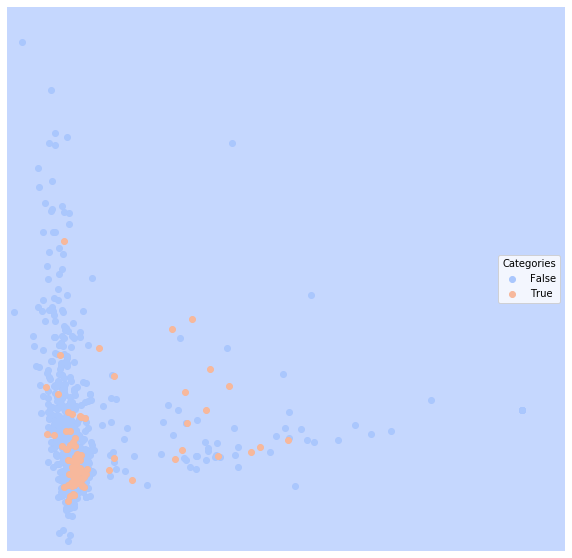

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


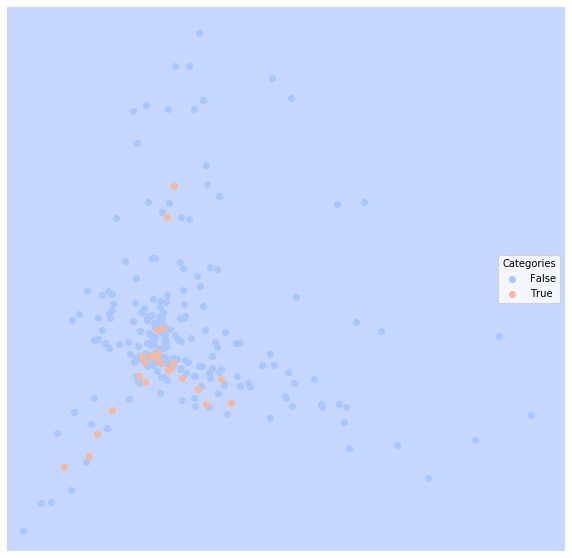

In [103]:
lucem_illud_2020.plotregions(clf_tree, tweets_tree_train)
lucem_illud_2020.plotregions(clf_tree, tweets_tree_test)

In [104]:
lucem_illud_2020.evaluateClassifier(clf_tree, tweets_tree_test)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.079245,0.597917,0.922780,0.922709,0.995833
True,0.079245,0.597917,0.833333,0.242138,0.200000


In [106]:
## Random Forest

tree = sklearn.tree.DecisionTreeClassifier(max_depth=10) #Create an instance of our decision tree classifier.

bag = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1) #Each tree uses up to 80% of the data

In [107]:
bag.fit(np.stack(tweets_tree_train['vect'], axis =0), tweets_tree_train['category']) #Fit the bagged classifier

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=10,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
      

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


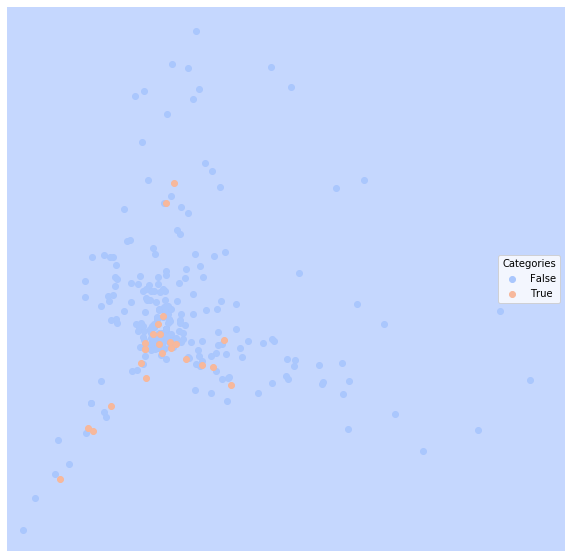

In [108]:
lucem_illud_2020.plotregions(bag, tweets_tree_test)

In [109]:
lucem_illud_2020.evaluateClassifier(bag, tweets_tree_test)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.079245,0.597917,0.922780,0.922709,0.995833
True,0.079245,0.597917,0.833333,0.242138,0.200000


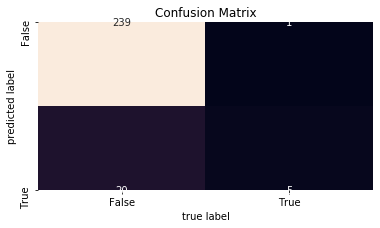

In [110]:
lucem_illud_2020.plotConfusionMatrix(bag, tweets_tree_test)

## <span style="color:red">*Exercise 4*</span>

<span style="color:red">In the cells immediately following, perform and visualize k-nearest neighbor classification using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. Visualize the classification of data points and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Articulate how the *k*-nearest neighbor approach relates to *k*-means clustering explored in ***week 3***?

In [126]:
#initialize classifier

n_neighbors = 4
weights="uniform"
clf_knearest = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

In [127]:
print(len(tweets_tree_train))
print(len(tweets_tree_test))

clf_knearest.fit(np.stack(tweets_tree_train['vect'], axis = 0), tweets_tree_train['category'])



1062
265


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [128]:
lucem_illud_2020.evaluateClassifier(clf_knearest, tweets_tree_train)

/Users/reginacatipon/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.10452,0.5,0.89548,0.89548,1.0
True,0.10452,0.5,0.00000,0.10452,0.0


In [129]:
#Test
tweets_tree_test['nb_predict'] = clf_knearest.predict(np.stack(tweets_tree_test['vect'], axis=0))

print("Testing score:")
print(clf_knearest.score(np.stack(tweets_tree_test['vect'], axis=0), tweets_tree_test['category']))

Testing score:
0.9056603773584906


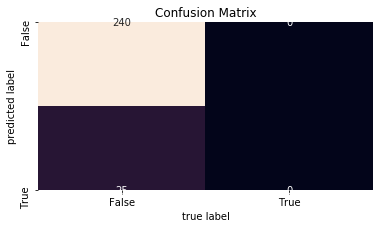

In [132]:
lucem_illud_2020.plotConfusionMatrix(clf_knearest, tweets_tree_test)

## <span style="color:red">*Exercise 5*</span>

<span style="color:red">In the cells immediately following, perform a neural network classification and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). How does this classify relevant to *k*-nearest neighbor, Naive Bayes, logistic and decision-tree approaches?

In [121]:
print(len(tweets_tree_train))
print(len(tweets_tree_test))


#fit the data
tweet_nn = sklearn.neural_network.MLPClassifier()
tweet_nn.fit(np.stack(tweets_tree_train['vect'], axis=0), tweets_tree_train['category'])





1062
265


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [122]:
lucem_illud_2020.evaluateClassifier(tweet_nn, tweets_tree_test)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.079245,0.669583,0.936255,0.935618,0.979167
True,0.079245,0.669583,0.642857,0.291806,0.360000


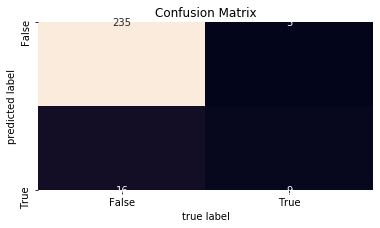

In [123]:
lucem_illud_2020.plotConfusionMatrix(tweet_nn, tweets_tree_test)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


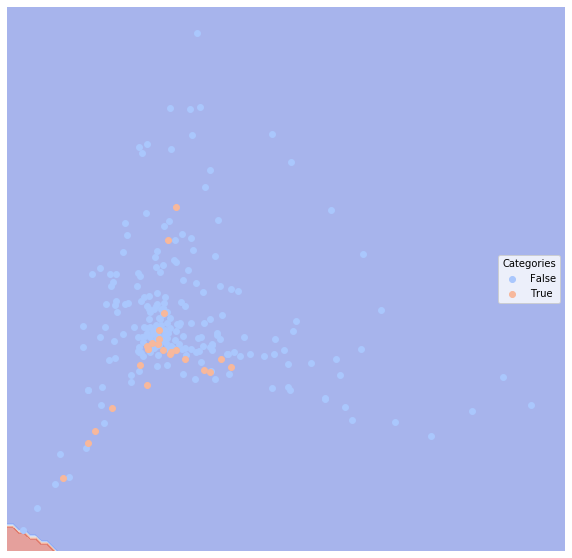

In [124]:
lucem_illud_2020.plotregions(tweet_nn, tweets_tree_test)

Working through the fake news Twitter dataset and applying the different models, I realized that the reason why it was so hard to classify the tweet as fakew news or not, was because the language in the text was so similar. So I decided to try the model again but this time with the urls. I would 
